In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
import pandas as pd
import csv
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

In [9]:
data = ascii.read('ASTR19_S22_group_project_data.txt') #read in the file
df = data.to_pandas()
df.columns = ['Days','X','Y']

def time_to_decimal(time):  #make the time data plottable 
    hours, minutes = map(int, time.split(':'))
    return round(hours + (minutes / 60),2)
    
#creating x and y lists from a df
x = df['X'].to_numpy()
days = df['Days'].to_numpy()
x=[time_to_decimal(time) for time in x]
y = df['Y'].to_numpy()

#sorting x and y by highs and lows
high = []
low = []
for i in range(1,42):
    day1 = df[df['Days'] == i]
    day1_sorted = day1.sort_values(by=['Y'])
    low.append(day1_sorted.iloc[0].values.tolist())
    high.append(day1_sorted.iloc[1].values.tolist())


In [11]:


high_x = [time_to_decimal(time[1]) for time in high]
high_y = [time[2] for time in high]

low_x = [time_to_decimal(time[1]) for time in low]
low_y = [time[2] for time in low]

#appending sorted highs and lows to a y list
n_x = []
n_y = []
j=1
for i in range(0,len(high_x)):
    n_x.append(j)
    n_y.append(high_y[i])
    n_x.append(j)
    n_y.append(low_y[i])
    j = j+1
    

In [12]:
# Combining x and y values for curve fitting
x_combined = n_x
y_combined = n_y
x_a=[i for i in range(1,41)]


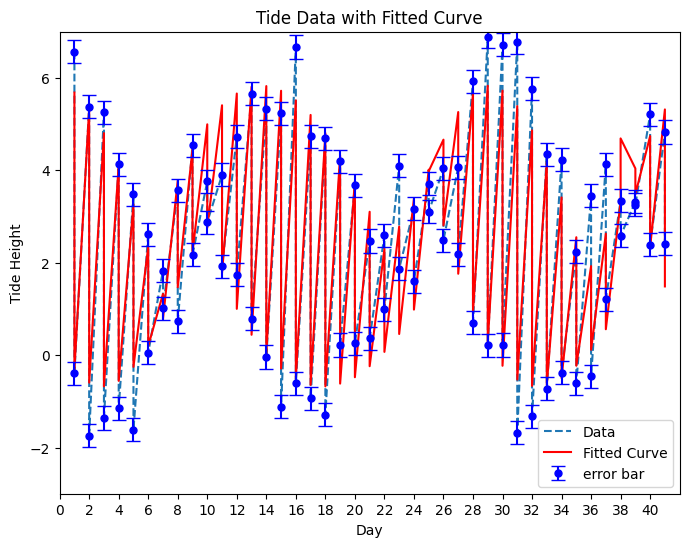

In [34]:

# Define the function to fit (sine wave)
def oscillatory_function(x, amplitude, frequency, phase_shift, vertical_shift):
    return amplitude * np.sin(2.0 * np.pi * frequency * x + phase_shift) + vertical_shift

# Fitting the function to the data
initial_guess = [5, 0.1, 0, 0]  # Initial guess for the parameters
params, covariance = curve_fit(oscillatory_function, np.array(x), np.array(y), p0=initial_guess)

# Generate points for the fitted curve
x_curve = np.linspace(min(np.array(x)), max(np.array(x)), 1000)
y_curve = oscillatory_function(np.array(x_curve), *params)
high_y_curve = oscillatory_function(np.array(x), *params)



# Plotting the data points and the fitted curve
plt.figure(figsize=(8, 6))
plt.plot(np.array(n_x), np.array(y),linestyle='--', label='Data', )
plt.plot(np.array(n_x), high_y_curve, color='red', label='Fitted Curve')

#ploting the error bar
plt.errorbar(n_x,n_y, yerr=0.25, color='blue',label='error bar', fmt = 'o',  markersize=5, capsize=5)

# Set limits and ticks for X and Y axes
plt.xlim(0, 42)
plt.xticks(range(0, 42, 2))
plt.ylim(-3, 7)

# Labels and legend
plt.xlabel('Day')
plt.ylabel('Tide Height')
plt.legend()
plt.title('Tide Data with Fitted Curve')

plt.savefig('fitted_model.pdf', bbox_inches ='tight')
plt.show()



82


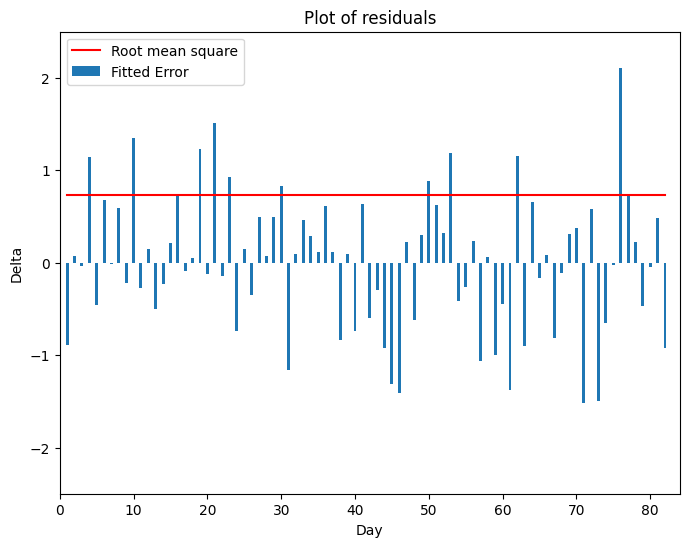

In [42]:



#array of x_combined 
xc=np.array(x)

#creating delta
delta=[]

for i in range(len(high_y_curve)):
    real_y = np.array(y)[i]
    calc_y = high_y_curve[i]
    d = calc_y - real_y 
    delta.append(d)

rms = np.sqrt(np.mean(np.array(delta)**2))


#creating a bargraph of delta
plt.figure(figsize = (8,6))
l_x = np.linspace(1, 82, 82)
rms_y = np.linspace(rms,rms,82)
plt.bar(np.array(l_x), delta, width = 0.4, label='Fitted Error')
plt.plot(np.array(l_x), rms_y,color='red', label='Root mean square')

#plt.scatter(xc, delta, color='blue', label='Delta bargraph')

# Set limits and ticks for X and Y axes
plt.xlim(0, 84)
#plt.xticks(range(0, 84, 2))
plt.ylim(-2.5, 2.5)

# Labels and legend
plt.xlabel('Day')
plt.ylabel('Delta')
plt.legend()
plt.title('Plot of residuals')

plt.savefig('residuals_plot.pdf', bbox_inches ='tight')
plt.show()


0.7343604314819532


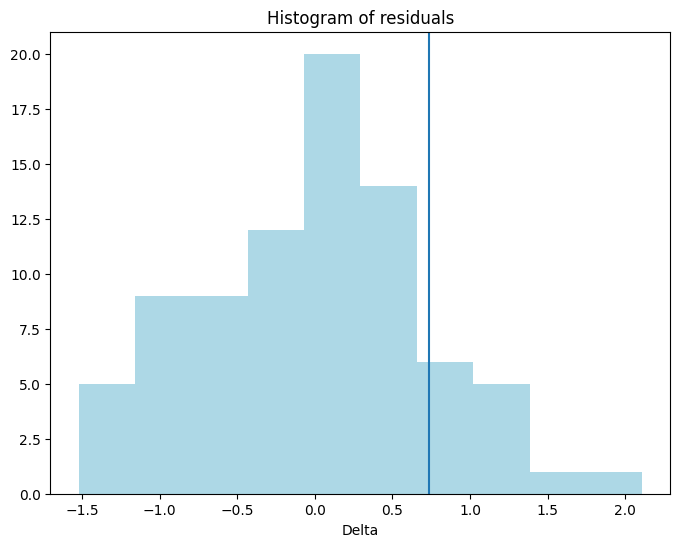

In [43]:
#creating a bargraph of delta
std_x = np.std(delta)
plt.figure(figsize = (8,6))
plt.hist(delta, color = "lightblue")
plt.axvline(std_x, ymin = 0, ymax = max(delta))

print(std_x)

# Labels and legend
plt.xlabel('Delta')
plt.title('Histogram of residuals')

plt.savefig('histogram_of_residuals.pdf', bbox_inches ='tight')
plt.show()

0.8102131930119421


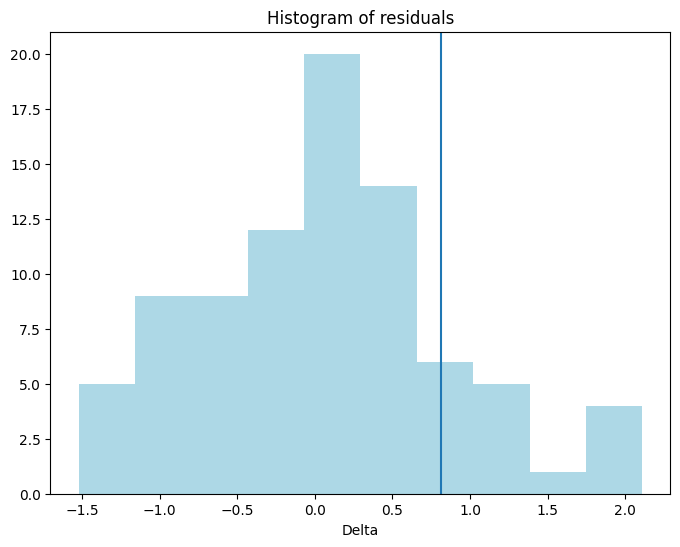

In [46]:
#add the 2ft to delta
new_delta = delta 
new_delta.insert(0,2.0)
    

#creating a bargraph of delta
std_x1 = np.std(new_delta)
plt.figure(figsize = (8,6))
plt.hist(new_delta, color = "lightblue")
plt.axvline(std_x1, ymin = 0, ymax = max(new_delta))

print(std_x1)

# Labels and legend
plt.xlabel('Delta')
plt.title('Histogram of residuals')

plt.savefig('histogram_of_residuals.pdf', bbox_inches ='tight')
plt.show()